# 대회 소개 

## File descriptions
#### train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 
#### 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
#### test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
#### sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.

## Data fields
#### ID : 집을 구분하는 번호
#### date : 집을 구매한 날짜
#### price : 집의 가격(Target variable)
#### bedrooms : 침실의 수
#### bathrooms : 화장실의 수
#### sqft_living : 주거 공간의 평방 피트(면적)
#### sqft_lot : 부지의 평방 피트(면적)
#### floors : 집의 층 수
#### waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
#### view : 집이 얼마나 좋아 보이는지의 정도
#### condition : 집의 전반적인 상태
#### grade : King County grading 시스템 기준으로 매긴 집의 등급
#### sqft_above : 지하실을 제외한 평방 피트(면적)
#### sqft_basement : 지하실의 평방 피트(면적)
#### yr_built : 지어진 년도
#### yr_renovated : 집을 재건축한 년도
#### zipcode : 우편번호
#### lat : 위도
#### long : 경도
#### sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
#### sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

### 데이터에 대한 전처리를 train, test.csv 모두 동일하게 진행한 후 가장 주택가격을 잘 예측할 수 있는 모델을 선정하여

### test.csv의 특성들을 가지고 price를 예측한 후 submission 파일 형식에 맞게 작성합니다. 제한시간내에 제출한 
### 결과값 중 가장 높은 등수와 해당 점수를 캡처하여 작성하신 코드와 함께 제출합니다

#### hint : 시애틀

In [1]:
####### module import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import matplotlib as mpl
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 법위가 눈에 잘 띄도록 
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
## 한글 깨짐 방지
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# Load Dataset

In [3]:
train = pd.read_csv('data/train.csv')
print(train.shape)
train.head()

(15035, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
test = pd.read_csv('data/test.csv')
print(test.shape)
test.head()

(6468, 20)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1010.7+ KB


In [7]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
test.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6468.000000,6468.00000,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,18268.500000,3.37786,2.118313,2075.981293,1.469916e+04,1.488327,0.008658,0.235467,3.416821,7.655535,1779.556277,296.425015,1970.949443,86.933983,98077.587044,47.558726,-122.214039,1974.429654,12659.800402
std,1867.295103,0.99064,0.775851,910.613001,3.870428e+04,0.544007,0.092652,0.773616,0.658267,1.161900,820.834051,447.218709,29.292377,407.210870,53.936590,0.139659,0.139766,671.597761,26380.422371
min,15035.000000,0.00000,0.000000,370.000000,6.810000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.512000,460.000000,748.000000
25%,16651.750000,3.00000,1.750000,1420.000000,5.084000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.467175,-122.327000,1480.000000,5100.000000
50%,18268.500000,3.00000,2.250000,1920.000000,7.607000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.572150,-122.229000,1820.000000,7664.500000
75%,19885.250000,4.00000,2.500000,2520.000000,1.066425e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,590.000000,1997.000000,0.000000,98118.000000,47.677400,-122.123000,2370.000000,10125.000000
max,21502.000000,33.00000,6.750000,9640.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.364000,5610.000000,438213.000000


# Exploratory Data Analysis

In [9]:
!pip install missingno

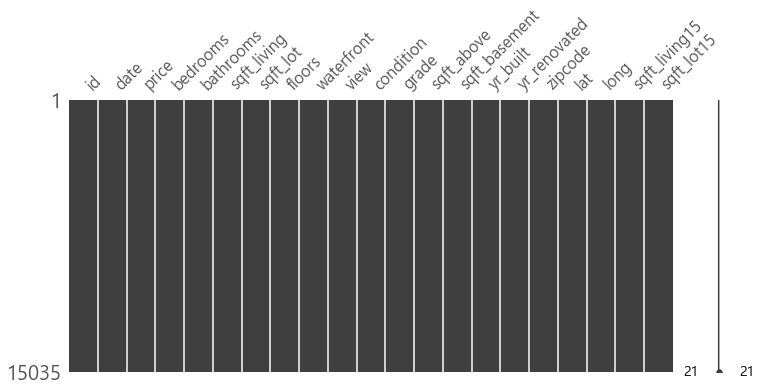

In [10]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

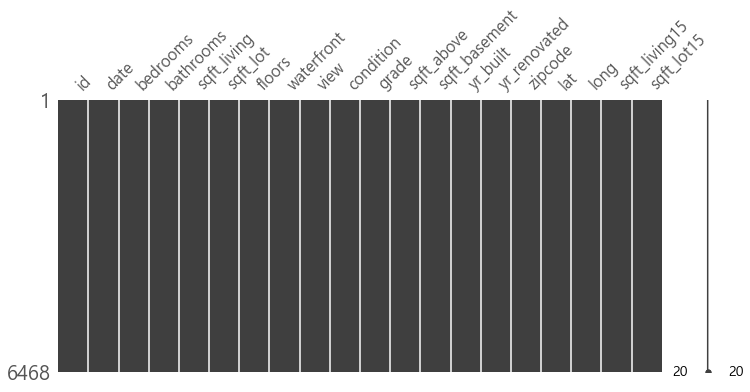

In [11]:
msno.matrix(test, figsize=(12,5))

In [12]:
train['date'].unique()


array(['20141013T000000', '20150225T000000', '20150218T000000',
       '20140627T000000', '20150115T000000', '20150403T000000',
       '20140527T000000', '20140528T000000', '20141007T000000',
       '20150312T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140516T000000',
       '20141120T000000', '20141103T000000', '20140626T000000',
       '20141201T000000', '20141110T000000', '20140624T000000',
       '20141203T000000', '20140613T000000', '20141230T000000',
       '20150213T000000', '20140620T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20150325T000000',
       '20140716T000000', '20141231T000000', '20140512T000000',
       '20140819T000000', '20150407T000000', '20140827T000000',
       '20141210T000000', '20140828T000000', '20141207T000000',
       '20140603T000000', '20140909T000000', '20141009T000000',
       '20140825T000000', '20140912T0000

In [13]:
## date 필드 전처리 - 불필요 string 제거 및 date 타입으로 변경 
train[['yyyymmdd','T000000']] = train.date.str.split("T", expand=True)
train['yyyymmdd'] = pd.to_datetime(train['yyyymmdd'])
del train['T000000']
train.head()

test[['yyyymmdd','T000000']] = test.date.str.split("T", expand=True)
test['yyyymmdd'] = pd.to_datetime(train['yyyymmdd'])
del test['T000000']
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yyyymmdd
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-10-13
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2015-02-25
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2015-02-18
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2014-06-27
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015-01-15


In [14]:
## date 필드 전처리 - year/month/day 분리
train["year"] = train["yyyymmdd"].dt.year
train["month"] = train["yyyymmdd"].dt.month
train["day"] = train["yyyymmdd"].dt.day

print(train.shape)
train.head(2)

test["year"] = test["yyyymmdd"].dt.year
test["month"] = test["yyyymmdd"].dt.month
test["day"] = test["yyyymmdd"].dt.day

print(test.shape)
test.head(2)

(15035, 25)
(6468, 24)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yyyymmdd,year,month,day
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014-10-13,2014,10,13
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2015-02-25,2015,2,25


## Seaborn 을 통해 특성들의 연관 관계 확인

In [15]:
# figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
# figure.set_size_inches(18,10)

# sns.barplot(data=train, x="year", y="price", ax=ax1)
# sns.barplot(data=train, x="month", y="price", ax=ax2)
# sns.barplot(data=train, x="day", y="price", ax=ax3)

In [16]:
# figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
# figure.set_size_inches(18,10)
# sns.barplot(data=train, x="bedrooms", y="price", ax=ax1)
# sns.barplot(data=train, x="bathrooms", y="price", ax=ax2)
# sns.barplot(data=train, x="sqft_living", y="price", ax=ax3)

In [17]:
# figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
# figure.set_size_inches(18,10)
# # sns.barplot(data=train, x="sqft_lot", y="price", ax=ax1)
# sns.barplot(data=train, x="floors", y="price", ax=ax2)
# sns.barplot(data=train, x="waterfront", y="price", ax=ax3)

In [18]:
# figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
# figure.set_size_inches(18,10)

# sns.barplot(data=train, x="view", y="price", ax=ax1)
# sns.barplot(data=train, x="condition", y="price", ax=ax2)
# sns.barplot(data=train, x="grade", y="price", ax=ax3)

In [19]:
# figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
# figure.set_size_inches(18,10)

# sns.barplot(data=train, x="yr_built", y="price", ax=ax1)
# sns.barplot(data=train, x="yr_renovated", y="price", ax=ax2)
# sns.barplot(data=train, x="floors", y="price", ax=ax3)
# sns.barplot(data=train, x="waterfront", y="price", ax=ax4)

In [20]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yyyymmdd', 'year',
       'month', 'day'],
      dtype='object')

In [21]:
# corrMatt = train[['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yyyymmdd', 'year',
#        'month', 'day','price']]

# corrMatt = corrMatt.corr()
# print(corrMatt)

# mask = np.array(corrMatt)
# print(mask)

# mask[np.tril_indice_from(mask)] = False
# print(mask)

In [22]:
# fig, ax = plt.subplots()
# fig.set_size_inches(20,10)
# sns.heatmap(corrMatt, mask=mask, vmax=0.8, square=True, annot=True)

## Train

In [31]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yyyymmdd', 'year',
       'month', 'day'],
      dtype='object')

In [50]:
##  date 관련 필드 제외한 특성들
feature_names1 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

## 적은 특성들을 가지고 Train - date and yr_built, renovated 관련 제외
feature_names2 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

## 적은 특성들을 가지고 Train - date and yr_built, renovated , sqrt 관련 제외
feature_names3 = ['bedrooms', 'bathrooms', 'sqft_living',
        'floors', 'waterfront', 'view', 'condition', 'grade',
        'lat', 'long', ]

In [51]:
X_train = train[feature_names3]
print(X_train.shape)
X_train.head()

(15035, 10)


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,lat,long
0,3,1.00,1180,1.0,0,0,3,7,47.5112,-122.257
1,2,1.00,770,1.0,0,0,3,6,47.7379,-122.233
2,3,2.00,1680,1.0,0,0,3,8,47.6168,-122.045
3,3,2.25,1715,2.0,0,0,3,7,47.3097,-122.327
4,3,1.50,1060,1.0,0,0,3,7,47.4095,-122.315


In [52]:
label_name = "price"
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(15035,)


0    221900.0
1    180000.0
2    510000.0
3    257500.0
4    291850.0
Name: price, dtype: float64

#### RMSLE Scorer

In [53]:
def rmsle(y, y_, convertExp=True) : 
    if convertExp : 
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## Modeling

In [54]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.utils.testing import ignore_warnings

In [55]:
y_train_log = np.log1p(y_train)

#### XGBoost Regressor with GridSearchCV

In [56]:
model = xgb.XGBRegressor(n_jobs = -1)
param_grid = {'max_depth': [5,6,7,8], 'gamma': [1, 2, 4], 'learning_rate': [0.1, 0.2, 0.3, 0.5]}

with ignore_warnings(category=DeprecationWarning) : 
    xgb_grid = GridSearchCV(model, param_grid, cv=10, refit=True, verbose=1)
    xgb_grid.fit(X_train, y_train_log)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a futur

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

#### Scoring

In [45]:
## np.sqrt((1/len(y_pred)*np.sum(y_pred - y)**2))


## Predict

In [46]:
X_test = test[feature_names3]
print(X_test.shape)

(6468, 16)


In [47]:
prediction = xgb_grid.predict(X_test)

## Submit

In [48]:
submission = pd.read_csv("data/sample_submission.csv", index_col="id")

submission["price"] = np.exp(prediction).astype(np.int32)
print(submission.shape)
submission.head()

(6468, 1)


,price
id,
15035,-2147483648
15036,-2147483648
15037,-2147483648
15038,-2147483648
15039,-2147483648


## Export CSV

In [49]:
submission.to_csv("data/result.csv")